In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage
from IPython.display import Image

11501568/11490434 [==============================] - 0s 0us/step
8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


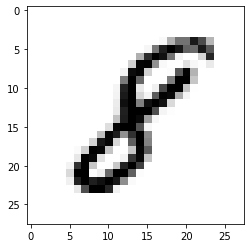

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.001,
                          patience=3,
                          verbose=0,
                          mode='auto')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.001)
callbacks = [earlystop, learning_rate_reduction]

In [5]:
from tensorflow.keras.models import Sequential

# Creating a Sequential Model and adding the layers
model_1 = Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3,3),input_shape = input_shape),
                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                    tf.keras.layers.Conv2D(32, kernel_size=(3,3)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dense(64,activation=tf.nn.relu),
                    tf.keras.layers.Dense(32,activation = tf.nn.relu),
                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


model_1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_1.fit(x=x_train,y=y_train, epochs=10, validation_data = (x_test,y_test),callbacks = callbacks)

Epoch 1/10
1875/1875 [==============================] - 42s 5ms/step - loss: 0.1789 - accuracy: 0.9459 - val_loss: 0.0725 - val_accuracy: 0.9756
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - accuracy: 0.9855 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0668 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0575 - val_accura

In [6]:
model_2 = Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3,3),input_shape = input_shape),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(32,activation = tf.nn.relu),
                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_2.fit(x=x_train,y=y_train, epochs=10, validation_data = (x_test,y_test),callbacks = callbacks)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3005 - accuracy: 0.9072 - val_loss: 0.1327 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1755 - accuracy: 0.9477 - val_loss: 0.1081 - val_accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1373 - accuracy: 0.9577 - val_loss: 0.0982 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1216 - accuracy: 0.9627 - val_loss: 0.0865 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1085 - accuracy: 0.9665 - val_loss: 0.0900 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0992 - accuracy: 0.9687 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0879 - accuracy: 0.9718 - val_loss: 0.0857 - val_accura

In [7]:
model_3 = Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3,3),input_shape = input_shape),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


model_3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_3.fit(x=x_train,y=y_train, epochs=10, validation_data = (x_test,y_test),callbacks = callbacks)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2059 - accuracy: 0.9380 - val_loss: 0.1118 - val_accuracy: 0.9649
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0912 - accuracy: 0.9723 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 0.0816 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0944 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.1029 - val_accuracy: 0.9743


In [8]:
model_4 = Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3,3),input_shape = input_shape),
                    tf.keras.layers.Conv2D(32,kernel_size = (3,3)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


model_4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_4.fit(x=x_train,y=y_train, epochs=10, validation_data = (x_test,y_test),callbacks = callbacks)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2320 - accuracy: 0.9290 - val_loss: 0.1341 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1321 - accuracy: 0.9601 - val_loss: 0.0877 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1051 - accuracy: 0.9673 - val_loss: 0.0888 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0874 - accuracy: 0.9720 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0732 - accuracy: 0.9762 - val_loss: 0.0953 - val_accuracy: 0.9751


170508288/170498071 [==============================] - 6s 0us/step


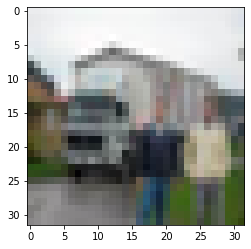

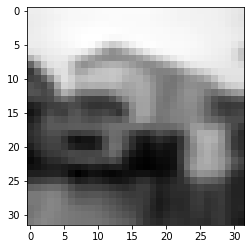

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Not all Filters will work on all images, so try a few different images
idx = 16

# Define the filter matrices 
Kx = np.array([[1/16, 1/8, 1/16], 
               [1/8, 1/4, 1/8], 
               [1/16, 1/8, 1/16]], np.float32)

Ky = np.array([[1/16, 1/8, 1/16], 
               [1/8, 1/4, 1/8], 
               [1/16, 1/8, 1/16]], np.float32)


# You may or may not need 2 directional filters
Ix = ndimage.filters.convolve(np.mean(x_train[idx], axis = 2), Kx)
Iy = ndimage.filters.convolve(np.mean(x_train[idx], axis = 2), Ky)

#Combine Filtered Images
G = np.hypot(Ix, Iy)

#Plot to combine
plt.figure()
plt.imshow(x_train[idx], cmap = 'gray')
plt.figure()
plt.imshow(G, cmap= 'gray')